# MIGMOBS

**Natalia Dedandi**



##Mobitity

Source: Global_Transnational_Mobility_dataset_v1.0

Using indicators
I1.1 Mouvements to country target_mobility

I1.2 Mouvements from country source_mobility

I1.3 Mouvements to country from LATAM target_mobility_latam

+ Aditional data from Global Transnational Mobility dataset of venezuela an bolivia

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# prompt: open a csv file forma drive folder

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Replace 'your_file_path' with the actual path to your CSV file in Google Drive
file_path = '/content/drive/MyDrive/3. Proyectos/MIGMOBS_nat/3_data_repository/GT_Mobility_v1.0.csv'

mobility_df = pd.read_csv(file_path)


Mounted at /content/drive


In [3]:
mobility_df

,source_name,target_name,source_iso3,target_iso3,year,estimated_trips,dist,source_region,target_region,source_subregion,target_subregion
0,Afghanistan,Rwanda,AFG,RWA,2014,29.0,5755.222,Asia,Africa,Southern Asia,Sub-Saharan Africa
1,Afghanistan,Netherlands,AFG,NLD,2014,6991.0,5361.400,Asia,Europe,Southern Asia,Western Europe
2,Afghanistan,Congo,AFG,COG,2011,0.0,7100.583,Asia,Africa,Southern Asia,Sub-Saharan Africa
3,Afghanistan,Hungary,AFG,HUN,2012,308.0,4367.694,Asia,Europe,Southern Asia,Eastern Europe
4,Afghanistan,Cabo Verde,AFG,CPV,2012,0.0,9324.580,Asia,Africa,Southern Asia,Sub-Saharan Africa
...,...,...,...,...,...,...,...,...,...,...,...
229315,Zimbabwe,Romania,ZWE,ROU,2015,79.0,NaN,Africa,Europe,Sub-Saharan Africa,Eastern Europe
229316,Zimbabwe,Cabo Verde,ZWE,CPV,2012,19.0,7006.872,Africa,Africa,Sub-Saharan Africa,Sub-Saharan Africa
229317,Zimbabwe,Romania,ZWE,ROU,2013,80.0,NaN,Africa,Europe,Sub-Saharan Africa,Eastern Europe
229318,Zimbabwe,Malta,ZWE,MLT,2014,19.0,6228.657,Africa,Europe,Sub-Saharan Africa,Southern Europe


In [4]:
# Filter for countries CHL and ARG
countries_target = ['CHL', 'ARG']

#target_iso3 country of destiny
country_df = mobility_df[mobility_df['target_iso3'].isin(countries_target)]

In [5]:
#contruyo un indicador por pais de destino y otro de origen sumando los estimated_by_hundred
country_df_grp = country_df.groupby(['year','target_iso3',])['estimated_trips'].sum().reset_index()


# Pivotar los datos para obtener las columnas con los países como series
pivot_data = country_df_grp.pivot_table(index='year', columns='target_iso3', values='estimated_trips', aggfunc='sum').fillna(0)
pivot_data = pivot_data / 100000.0
pivot_data

target_iso3,ARG,CHL
year,,
2011,121.33921,59.16559
2012,126.78938,65.28705
2013,125.00972,66.44472
2014,130.44692,71.72922
2015,150.21604,84.05899
2016,169.89971,97.91534


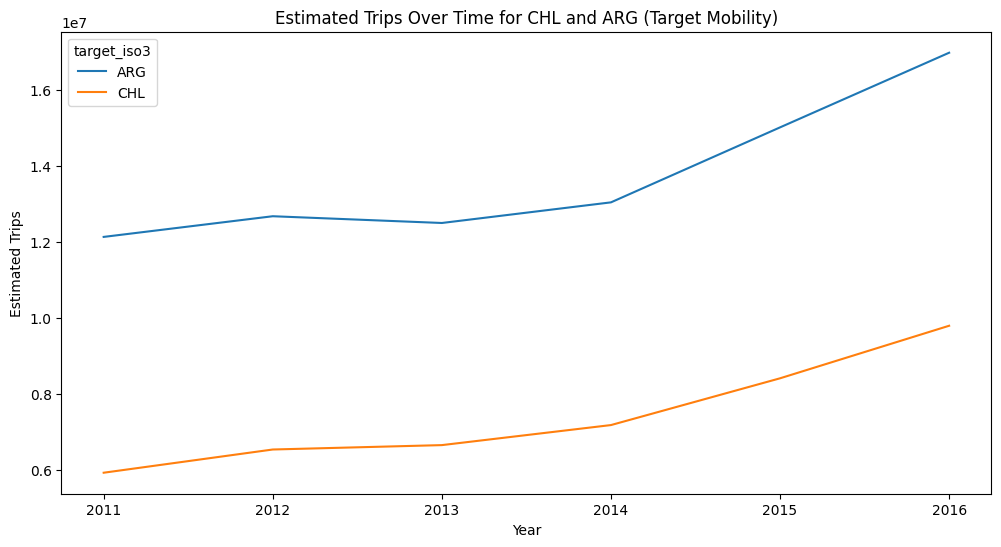

In [6]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='estimated_trips', hue='target_iso3', data=country_df_grp)
plt.title('Estimated Trips Over Time for CHL and ARG (Target Mobility)')
plt.xlabel('Year')
plt.ylabel('Estimated Trips')
plt.show()

En términos absolutos Argentina tiene un mayor volumen de viajes.
En ambos casos los datos parecen aumentar notablemente a partir de 2014.
¿que pasa en otros paises?

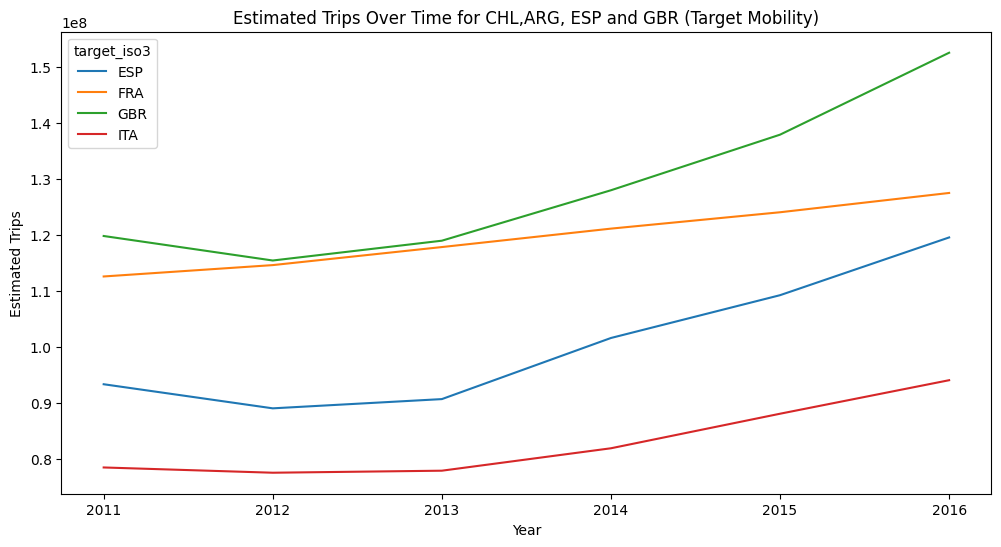

In [7]:
##Check for other countries the dinamic

countries_b = ['ESP','GBR','FRA','ITA']

country_b = mobility_df[mobility_df['target_iso3'].isin(countries_b)]

country_b_grp = country_b.groupby(['year','target_iso3',])['estimated_trips'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='estimated_trips', hue='target_iso3', data=country_b_grp)
plt.title('Estimated Trips Over Time for CHL,ARG, ESP and GBR (Target Mobility)')
plt.xlabel('Year')
plt.ylabel('Estimated Trips')
plt.show()

Las dinámicas de estos paises también parece mostrar un incremente desde 2014.. ¿es un sesgo de la base o es una caracterítica de las movilidades mundiales reales?

### Trips to CHL and ARG by regions

In [8]:

country_df_grp = country_df.groupby(['year','target_iso3','source_region',])['estimated_trips'].sum().reset_index()


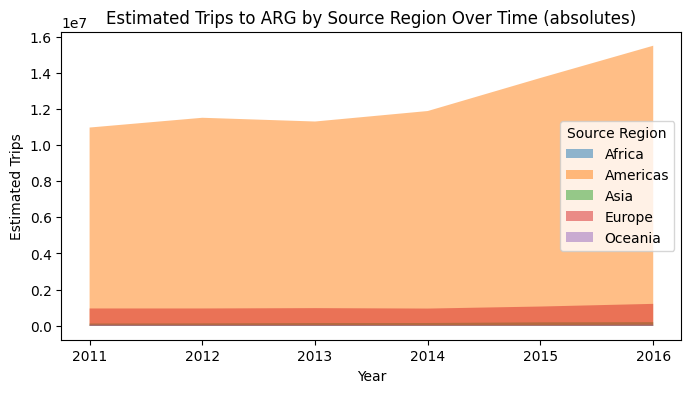

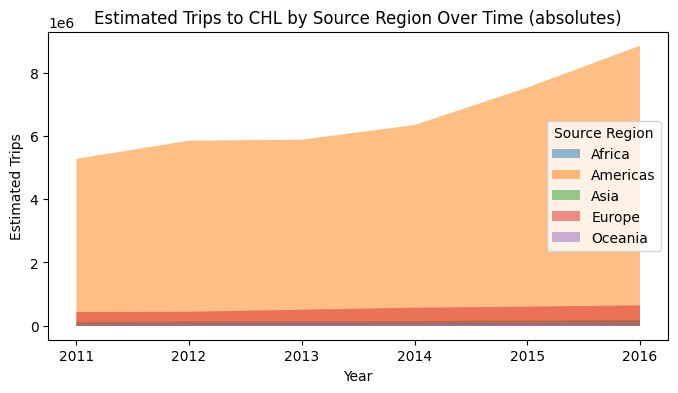

In [9]:
#plot for each country estimated trips by source_region and year
for target in country_df_grp['target_iso3'].unique():
    target_data = country_df_grp[country_df_grp['target_iso3'] == target]
    plt.figure(figsize=(8, 4))

    for region in target_data['source_region'].unique():
        region_data = target_data[target_data['source_region'] == region]
        plt.fill_between(region_data['year'], region_data['estimated_trips'], label=region, alpha=0.5)

    plt.title(f'Estimated Trips to {target} by Source Region Over Time (absolutes)')
    plt.xlabel('Year')
    plt.ylabel('Estimated Trips')
    plt.legend(title='Source Region')
    plt.show()

**Distribution by region (%)**

In [10]:
##distribution by region (%)
# Calculate total trips per year
total_trips_by_year = country_df_grp.groupby(['year', 'target_iso3'])['estimated_trips'].sum().reset_index()

# Merge total trips back into the original grouped data
country_df_grp = pd.merge(country_df_grp, total_trips_by_year, on=['year', 'target_iso3'], suffixes=('', '_total'))

# Calculate percentage
country_df_grp['percentage'] = (country_df_grp['estimated_trips'] / country_df_grp['estimated_trips_total']) * 100

country_df_grp

,year,target_iso3,source_region,estimated_trips,estimated_trips_total,percentage
0,2011,ARG,Africa,34801.0,12133921.0,0.286808
1,2011,ARG,Americas,10969123.0,12133921.0,90.400481
2,2011,ARG,Asia,122641.0,12133921.0,1.010729
3,2011,ARG,Europe,954411.0,12133921.0,7.865644
4,2011,ARG,Oceania,52945.0,12133921.0,0.436339
5,2011,CHL,Africa,33918.0,5916559.0,0.573272
6,2011,CHL,Americas,5272008.0,5916559.0,89.105982
7,2011,CHL,Asia,119612.0,5916559.0,2.021648
8,2011,CHL,Europe,430177.0,5916559.0,7.270729
9,2011,CHL,Oceania,60844.0,5916559.0,1.028368


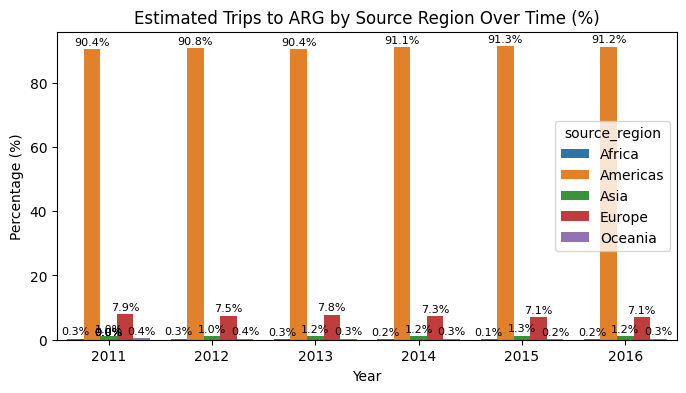

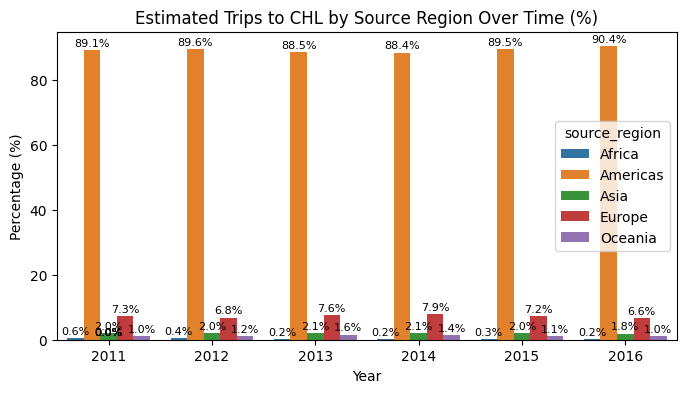

In [11]:
for target in country_df_grp['target_iso3'].unique():
    target_data = country_df_grp[country_df_grp['target_iso3'] == target]
    plt.figure(figsize=(8, 4))
    ax = sns.barplot(x='year', y='percentage', hue='source_region', data=target_data)
    plt.title(f'Estimated Trips to {target} by Source Region Over Time (%)')
    plt.xlabel('Year')
    plt.ylabel('Percentage (%)')

    # Annotate bars with percentage values
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                    textcoords='offset points')
    plt.show()

### Main countries of the Americas traveling to ARG and CHL

In [12]:
americas_df_ar = country_df[(country_df['source_region'] == 'Americas') & (country_df['target_iso3'] == 'ARG')]
americas_df_ar_grp = americas_df_ar.groupby(['year','source_iso3',])['estimated_trips'].sum().reset_index()
top5_americas_ar = americas_df_ar_grp.sort_values(['year', 'estimated_trips'], ascending=[True, False]).groupby(['year']).head(6)
top5_americas_ar.head()

,year,source_iso3,estimated_trips
5,2011,BRA,2876149.0
32,2011,URY,2378640.0
8,2011,CHL,2220104.0
27,2011,PRY,850521.0
33,2011,USA,833335.0


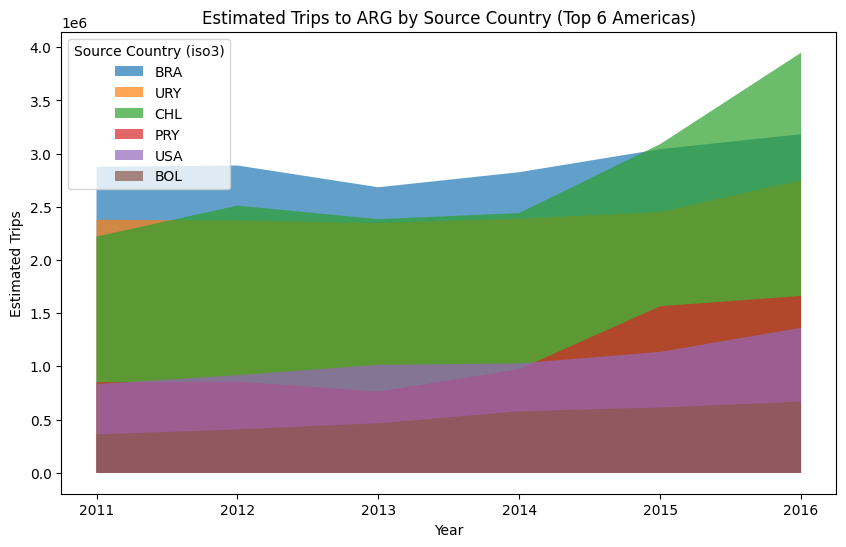

In [13]:

    plt.figure(figsize=(10, 6))
    for source in top5_americas_ar['source_iso3'].unique():
        source_data = top5_americas_ar[top5_americas_ar['source_iso3'] == source]
        plt.fill_between(source_data['year'], source_data['estimated_trips'], label=source, alpha=0.7)

    plt.title(f'Estimated Trips to ARG by Source Country (Top 6 Americas)')
    plt.xlabel('Year')
    plt.ylabel('Estimated Trips')
    plt.legend(title='Source Country (iso3)', loc='upper left')
    plt.show()

In [14]:
americas_df_ch = country_df[(country_df['source_region'] == 'Americas') & (country_df['target_iso3'] == 'CHL')]
americas_df_ch_grp = americas_df_ch.groupby(['year','source_iso3',])['estimated_trips'].sum().reset_index()
top5_americas_ch = americas_df_ch_grp.sort_values(['year', 'estimated_trips'], ascending=[True, False]).groupby(['year']).head(6)


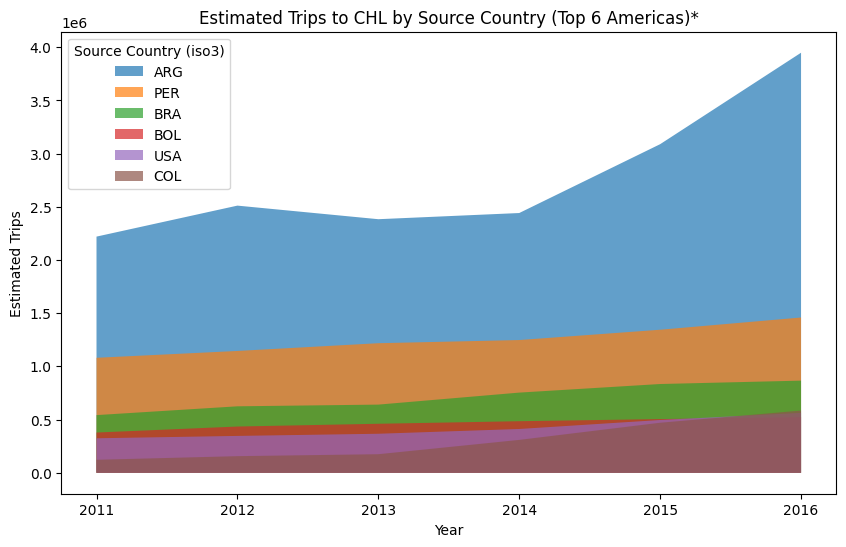

In [15]:
    plt.figure(figsize=(10, 6))
    for source in top5_americas_ch['source_iso3'].unique():
        source_data = top5_americas_ch[top5_americas_ch['source_iso3'] == source]
        plt.fill_between(source_data['year'], source_data['estimated_trips'], label=source, alpha=0.7)

    plt.title(f'Estimated Trips to CHL by Source Country (Top 6 Americas)*')
    plt.xlabel('Year')
    plt.ylabel('Estimated Trips')
    plt.legend(title='Source Country (iso3)', loc='upper left')
    plt.show()

Esto se puede verificar en mayor profundidad, en 2016 aparece Colombia en lugar de Bolivia y por eso se corta el gráfico original de top 5, si aumento a 6 aparece Colombia como aumenta.

En Argentina también al tomar 6 primeros paises que realizan viajes hacia Argentina aparece Bolivia en 6to lugar


### Analizing in particular Bolivia and Venezuela in the mobilities to Chile and Argentina.

In [16]:
#country_df is already filtered by CHL and ARG as target countries

df_ven_bol = country_df[country_df['source_iso3'].isin(['BOL', 'VEN','CHL','ARG'])]
df_ven_bol = df_ven_bol.groupby(['target_iso3','year','source_iso3',])['estimated_trips'].sum().reset_index()
df_ven_bol = df_ven_bol.sort_values(['year', 'estimated_trips'], ascending=[True, False])
df_ven_bol.head()

,target_iso3,year,source_iso3,estimated_trips
1,ARG,2011,CHL,2220104.0
18,CHL,2011,ARG,2220104.0
19,CHL,2011,BOL,377832.0
0,ARG,2011,BOL,359026.0
2,ARG,2011,VEN,132276.0


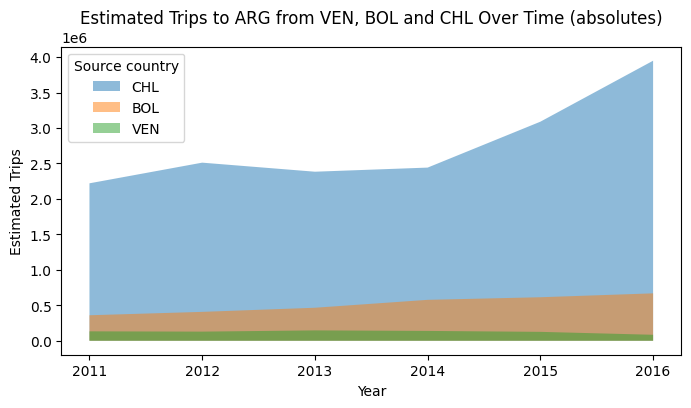

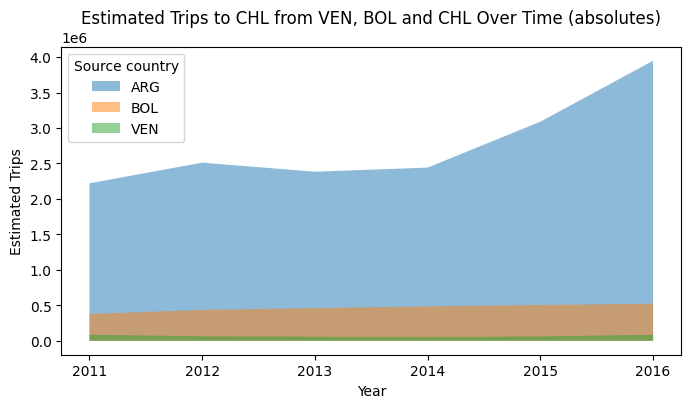

In [17]:
#plot for each country estimated trips by source_region and year
for target in df_ven_bol['target_iso3'].unique():
    target_data = df_ven_bol[df_ven_bol['target_iso3'] == target]
    plt.figure(figsize=(8, 4))

    for country in target_data['source_iso3'].unique():
        country_data = target_data[target_data['source_iso3'] == country]
        plt.fill_between(country_data['year'], country_data['estimated_trips'], label=country, alpha=0.5)

    plt.title(f'Estimated Trips to {target} from VEN, BOL and CHL Over Time (absolutes)')
    plt.xlabel('Year')
    plt.ylabel('Estimated Trips')
    plt.legend(title='Source country')
    plt.show()

In [18]:
df_ven_bol['estimated_by_hundred_m'] = df_ven_bol['estimated_trips'] / 100000


**Compare travels from Bolivia to ARG and CHL**.

In [19]:
# Filtrar los datos para obtener solo los viajes desde BOL hacia CHL y ARG
filtered_data_bol = df_ven_bol[(df_ven_bol['source_iso3'] == 'BOL')]

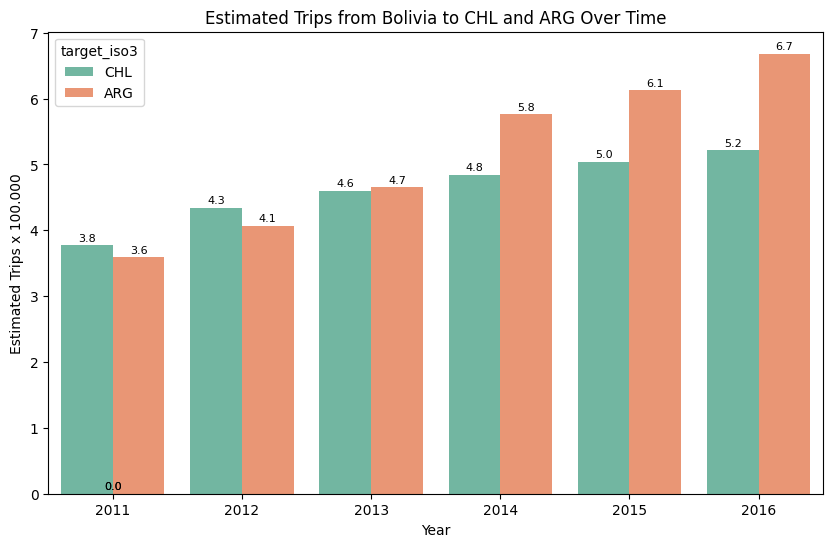

In [20]:
# Create the bar plot

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='year', y='estimated_by_hundred_m', hue='target_iso3', data=filtered_data_bol, palette = "Set2")
plt.title('Estimated Trips from Bolivia to CHL and ARG Over Time')
plt.xlabel('Year')
plt.ylabel('Estimated Trips x 100.000')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

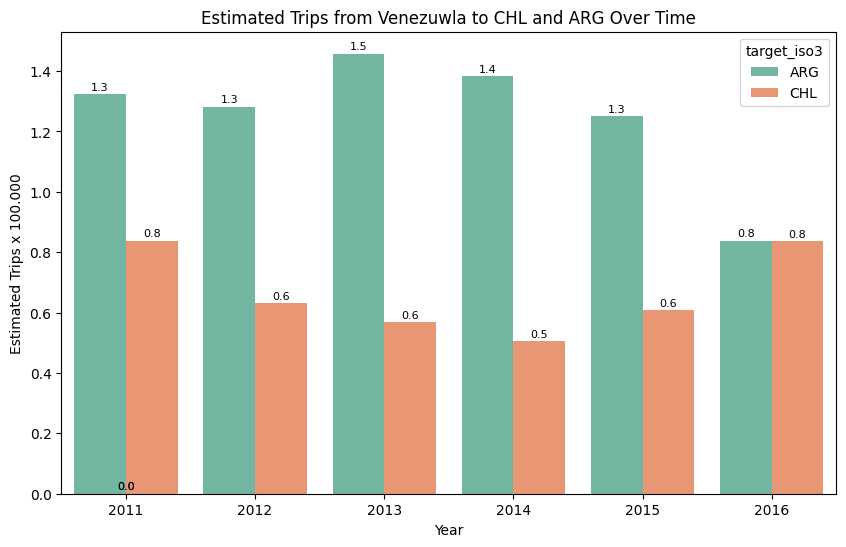

In [21]:
# Filtrar los datos para obtener solo los viajes desde BOL hacia CHL y ARG
filtered_data_bol = df_ven_bol[(df_ven_bol['source_iso3'] == 'VEN')]

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='year', y='estimated_by_hundred_m', hue='target_iso3', data=filtered_data_bol, palette = "Set2")
plt.title('Estimated Trips from Venezuwla to CHL and ARG Over Time')
plt.xlabel('Year')
plt.ylabel('Estimated Trips x 100.000')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

## Ratio of mobility per population

For this analysis I take the indicator base constructed. The base includes the aggregated indicators for ARG and CHL.

In [22]:
#G:\My Drive\3. Proyectos\MIGMOBS_nat\3_data_repository
# Replace 'your_file_path' with the actual path to your CSV file in Google Drive
file_path = '/content/drive/MyDrive/3. Proyectos/MIGMOBS_nat/3_data_repository/db_indicators.csv'

df_indicators = pd.read_csv(file_path)
print(df_indicators.head())

  country_code  year       value        indicator            fuente
0          ARG  2011  12133921.0  target_mobility  GT_Mobility_v1.0
1          BOL  2011   1493371.0  target_mobility  GT_Mobility_v1.0
2          CHL  2011   5916559.0  target_mobility  GT_Mobility_v1.0
3          VEN  2011   2849358.0  target_mobility  GT_Mobility_v1.0
4          ARG  2012  12678938.0  target_mobility  GT_Mobility_v1.0



mobility ratio = amount of trips from COUNTRY / total population x year

That is, the proportion of people who move over the total population.

This should be reviewed because in reality these trips from the country are as much of people from the country who move as of people who come.



In [23]:
# Filter for countries CHL and ARG
countries_source = ['CHL', 'ARG']

#target_iso3 country of destiny
country_source_df = mobility_df[mobility_df['source_iso3'].isin(countries_target)]

country_source_df_grp=country_source_df.groupby(['year','source_iso3',])['estimated_trips'].sum().reset_index()
country_source_df_grp

,year,source_iso3,estimated_trips
0,2011,ARG,12054578.0
1,2011,CHL,5927374.0
2,2012,ARG,12594641.0
3,2012,CHL,6550168.0
4,2013,ARG,12406685.0
5,2013,CHL,6669163.0
6,2014,ARG,12958212.0
7,2014,CHL,7231466.0
8,2015,ARG,14877831.0
9,2015,CHL,8503460.0


In [24]:
country_source_df_grp = country_source_df_grp.rename(columns={'source_iso3': 'country_code'})

In [25]:
#get population indicator
population_data = df_indicators[df_indicators['indicator'] == 'total_population_wb'][['country_code', 'year', 'value']].rename(columns={'value': 'total_population_wb'})
population_data

,country_code,year,total_population_wb
1178,VEN,1960,8160090.0
1179,BOL,1960,3702323.0
1180,CHL,1960,8153350.0
1181,ARG,1960,20386045.0
1182,VEN,1961,8455915.0
...,...,...,...
1421,ARG,2020,45191965.0
1422,VEN,2021,28237826.0
1423,BOL,2021,11937360.0
1424,CHL,2021,19456334.0


In [26]:

# Combinar los datos por país y año
merged_data = pd.merge(country_source_df_grp, population_data, on=['country_code', 'year'], how='inner')

# Calcular la nueva variable
merged_data['mobility_ratio'] = merged_data['estimated_trips'] / merged_data['total_population_wb']

# Mostrar las primeras filas del resultado
print(merged_data.head())

   year country_code  estimated_trips  total_population_wb  mobility_ratio
0  2011          ARG       12054578.0           41730660.0        0.288866
1  2011          CHL        5927374.0           17351816.0        0.341600
2  2012          ARG       12594641.0           42161721.0        0.298722
3  2012          CHL        6550168.0           17519119.0        0.373887
4  2013          ARG       12406685.0           42582455.0        0.291357


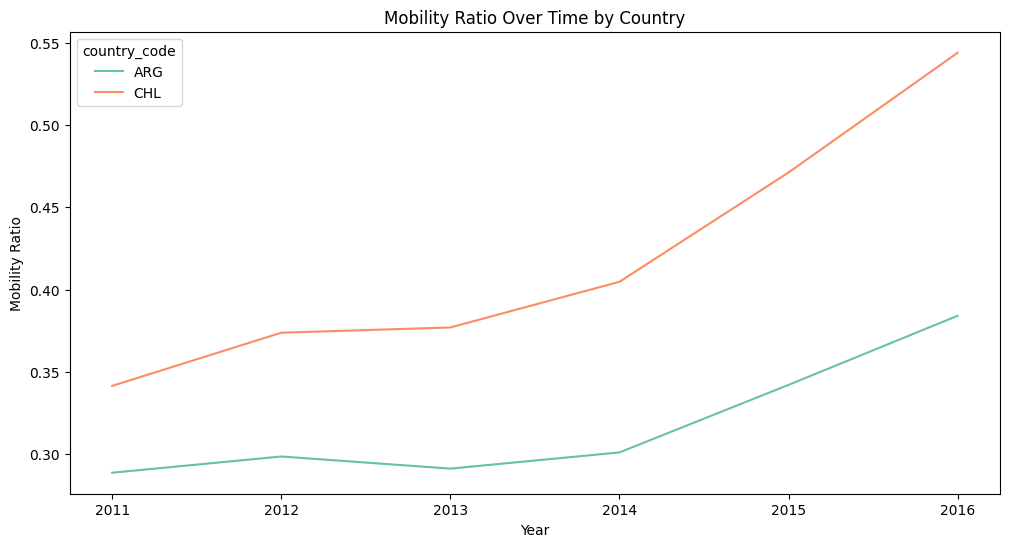

In [27]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='mobility_ratio', hue='country_code', data=merged_data, palette = "Set2")
plt.title('Mobility Ratio Over Time by Country')
plt.xlabel('Year')
plt.ylabel('Mobility Ratio')
plt.show()

The mobility ratio inverts the values between Argentina and Chile, showing that proportionally in relation to the population of that country there are more people moving from CHILE to other countries than from Argentina to other countries.

## Migration data

from:

https://riks.cris.unu.edu/annual-bilateral-migration-data


In [28]:
# Replace 'your_file_path' with the actual path to your CSV file in Google Drive
file_path = '/content/drive/MyDrive/3. Proyectos/MIGMOBS_nat/3_data_repository/migration_imputed_RIKS_dec2021.csv'

df2 = pd.read_csv(file_path)
print(df2.head())

  iso_or               origin iso_des destination  year  stock  flow  inflow  \
0    AAB  Antigua and Barbuda     ABW       Aruba  1960     16   NaN     NaN   
1    AAB  Antigua and Barbuda     ABW       Aruba  1961     16   0.0     NaN   
2    AAB  Antigua and Barbuda     ABW       Aruba  1962     15  -1.0     NaN   
3    AAB  Antigua and Barbuda     ABW       Aruba  1963     15   0.0     NaN   
4    AAB  Antigua and Barbuda     ABW       Aruba  1964     15   0.0     NaN   

   outflow  
0      NaN  
1      NaN  
2      NaN  
3      NaN  
4      NaN  


In [29]:
countries = ['ARG', 'CHL']
latam_mig_df = df2[df2['iso_des'].isin(countries)]


In [30]:
latam_mig_df_grp = latam_mig_df.groupby(['year', 'iso_des'])['stock'].sum().reset_index()
latam_mig_df_grp

,year,iso_des,stock
0,1960,ARG,2683416
1,1960,CHL,109563
2,1961,ARG,2630230
3,1961,CHL,108385
4,1962,ARG,2636364
...,...,...,...
117,2018,CHL,1207629
118,2019,ARG,2214059
119,2019,CHL,1399076
120,2020,ARG,2245714


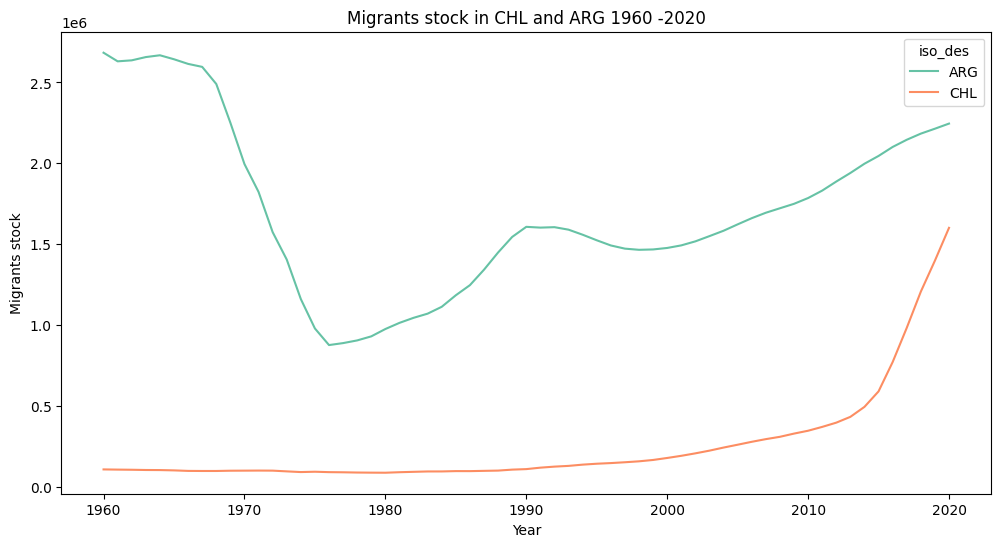

In [31]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='stock', hue='iso_des', data=latam_mig_df_grp, palette = "Set2")
plt.title('Migrants stock in CHL and ARG 1960 -2020')
plt.xlabel('Year')
plt.ylabel('Migrants stock')
plt.show()

Para analizar la % de migrantes tomo la base de población ONU y estos datos de CRIS. El indicador de Banco Mundial (I3.2 International migrant stock (% of population) tiene muchos valores ausentes.

Falta verificar si hay mejores datos

Ya tengo en el DF population los datos de la población para ARG y CHL entre 1960 y 2020

In [32]:
latam_mig_df_grp = latam_mig_df_grp.rename(columns={'iso_des': 'country_code'})

In [33]:
# Combinar los datos por país y año
merged_data = pd.merge(latam_mig_df_grp, population_data, on=['country_code', 'year'], how='inner')

# Calcular la nueva variable
merged_data['migration_proportion'] = merged_data['stock'] / merged_data['total_population_wb']

# Mostrar las primeras filas del resultado
print(merged_data.head())

   year country_code    stock  total_population_wb  migration_proportion
0  1960          ARG  2683416           20386045.0              0.131630
1  1960          CHL   109563            8153350.0              0.013438
2  1961          ARG  2630230           20726276.0              0.126903
3  1961          CHL   108385            8324802.0              0.013020
4  1962          ARG  2636364           21072538.0              0.125109


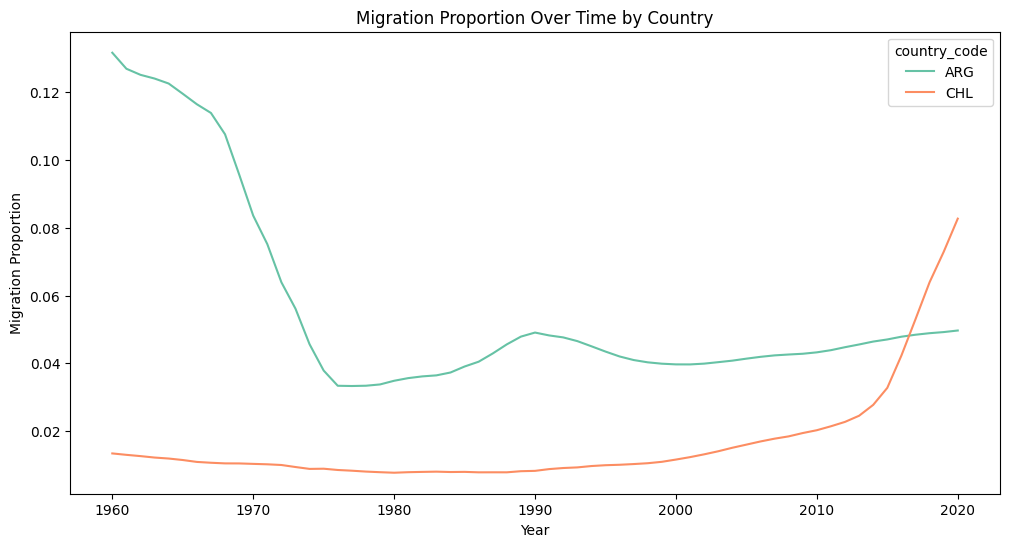

In [34]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='migration_proportion', hue='country_code', data=merged_data, palette = "Set2")
plt.title('Migration Proportion Over Time by Country')
plt.xlabel('Year')
plt.ylabel('Migration Proportion')
plt.show()

In [35]:
top5_iso_or_arg = latam_mig_df[latam_mig_df['iso_des'] == 'ARG'].groupby(['year', 'iso_or'])['stock'].sum().reset_index()
top5_iso_or_arg = top5_iso_or_arg.sort_values(['year', 'stock'], ascending=[True, False]).groupby('year').head(5)
top5_iso_or_arg

,year,iso_or,stock
96,1960,ITA,922057
185,1960,SPN,745871
151,1960,PAR,158613
38,1960,CHL,116570
156,1960,POL,113675
...,...,...,...
13153,2020,PAR,685696
13075,2020,BOL,423522
13082,2020,CHL,215150
13154,2020,PER,197795


Obtengo todos los paises que fueron top 5 desde 1960 y se grafican los cambios

In [36]:
print(top5_iso_or_arg['iso_or'].unique())

['ITA' 'SPN' 'PAR' 'CHL' 'POL' 'URU' 'BOL' 'SUN' 'YUG' 'PER' 'VEN']


In [37]:
origin_list=['ITA','SPN','PAR','CHL','POL','URU','BOL','SUN','YUG','PER','VEN']



In [38]:
# prompt: filtrar latam_mig_df  por iso_des = ARG y iso_orig i origin_list

historic_top5_arg = latam_mig_df[(latam_mig_df['iso_des'] == 'ARG') & (latam_mig_df['iso_or'].isin(origin_list))]
historic_top5_arg.head()

,iso_or,origin,iso_des,destination,year,stock,flow,inflow,outflow
332920,BOL,Bolivia,ARG,Argentina,1960,93271,NaN,NaN,9145.0
332921,BOL,Bolivia,ARG,Argentina,1961,93772,1315.0,14609.0,13294.0
332922,BOL,Bolivia,ARG,Argentina,1962,92958,9.0,15025.0,15016.0
332923,BOL,Bolivia,ARG,Argentina,1963,91235,-902.0,15555.0,16457.0
332924,BOL,Bolivia,ARG,Argentina,1964,93882,3457.0,15677.0,12220.0


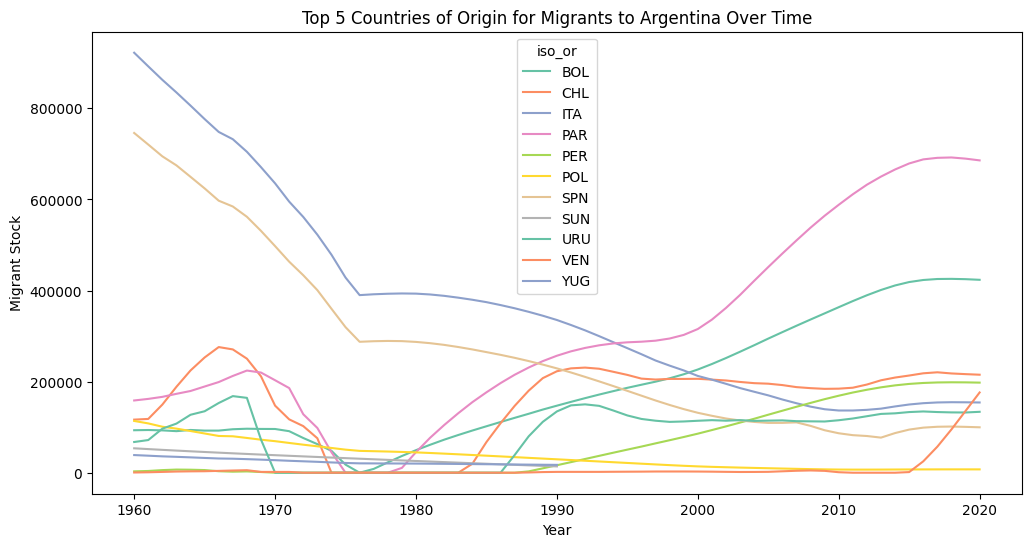

In [39]:
# prompt: grafico de linea de stock del dataframe  top5_iso_or_arg por year

plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='stock', hue='iso_or', data=historic_top5_arg, palette = "Set2")
plt.title('Top 5 Countries of Origin for Migrants to Argentina Over Time')
plt.xlabel('Year')
plt.ylabel('Migrant Stock')
plt.show()

In [40]:
top5_iso_or_chl = latam_mig_df[latam_mig_df['iso_des'] == 'CHL'].groupby(['year', 'iso_or'])['stock'].sum().reset_index()
top5_iso_or_chl = top5_iso_or_arg.sort_values(['year', 'stock'], ascending=[True, False]).groupby('year').head(5)

print(top5_iso_or_chl['iso_or'].unique())

['ITA' 'SPN' 'PAR' 'CHL' 'POL' 'URU' 'BOL' 'SUN' 'YUG' 'PER' 'VEN']


In [41]:
origin_list=['ITA','SPN','PAR','CHL','POL','URU','BOL','SUN','YUG','PER','VEN']
historic_top5_chl = latam_mig_df[(latam_mig_df['iso_des'] == 'CHL') & (latam_mig_df['iso_or'].isin(origin_list))]
historic_top5_chl.head()

,iso_or,origin,iso_des,destination,year,stock,flow,inflow,outflow
334643,BOL,Bolivia,CHL,Chile,1960,8332,NaN,NaN,NaN
334644,BOL,Bolivia,CHL,Chile,1961,8382,141.0,NaN,NaN
334645,BOL,Bolivia,CHL,Chile,1962,8167,-126.0,NaN,NaN
334646,BOL,Bolivia,CHL,Chile,1963,7885,-197.0,NaN,NaN
334647,BOL,Bolivia,CHL,Chile,1964,7759,-46.0,NaN,NaN


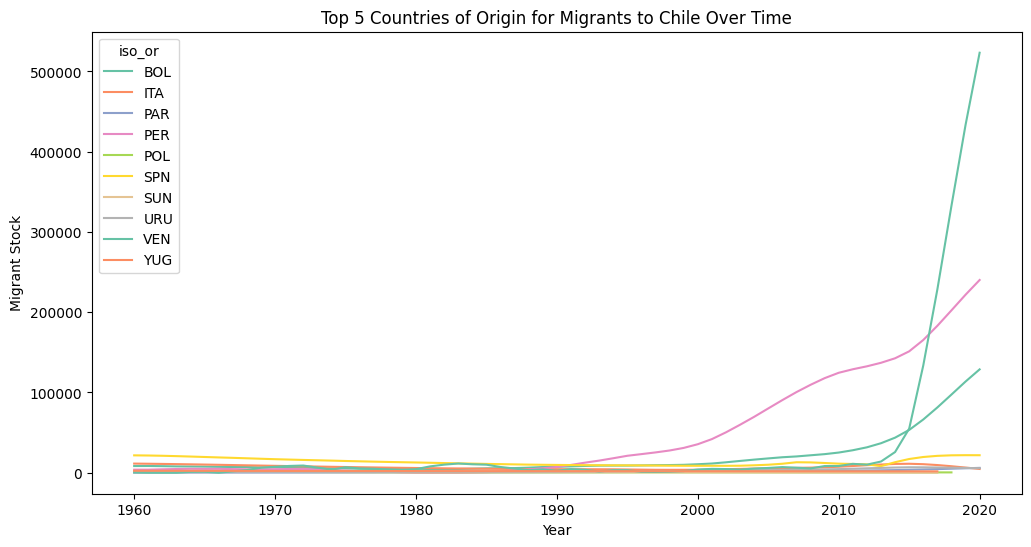

In [42]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='stock', hue='iso_or', data=historic_top5_chl, palette = "Set2")
plt.title('Top 5 Countries of Origin for Migrants to Chile Over Time')
plt.xlabel('Year')
plt.ylabel('Migrant Stock')
plt.show()

### Stock of migrants born in VEN, CHL BOL and living Argentina and Chile

In [43]:
# Filter latam_mig_df for iso_des ARG
migration_origin = latam_mig_df[latam_mig_df['iso_or'].isin(["BOL", "VEN", "CHL","ARG"])]
migration_origin.head()

,iso_or,origin,iso_des,destination,year,stock,flow,inflow,outflow
112567,ARG,Argentina,CHL,Chile,1960,12054,NaN,NaN,NaN
112568,ARG,Argentina,CHL,Chile,1961,12224,302.0,NaN,NaN
112569,ARG,Argentina,CHL,Chile,1962,12313,219.0,NaN,NaN
112570,ARG,Argentina,CHL,Chile,1963,12475,290.0,NaN,NaN
112571,ARG,Argentina,CHL,Chile,1964,12701,352.0,NaN,NaN


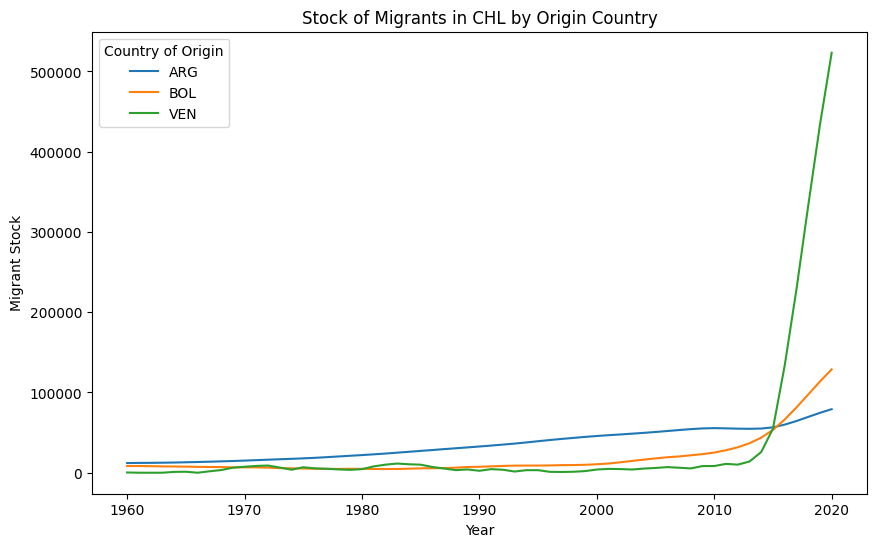

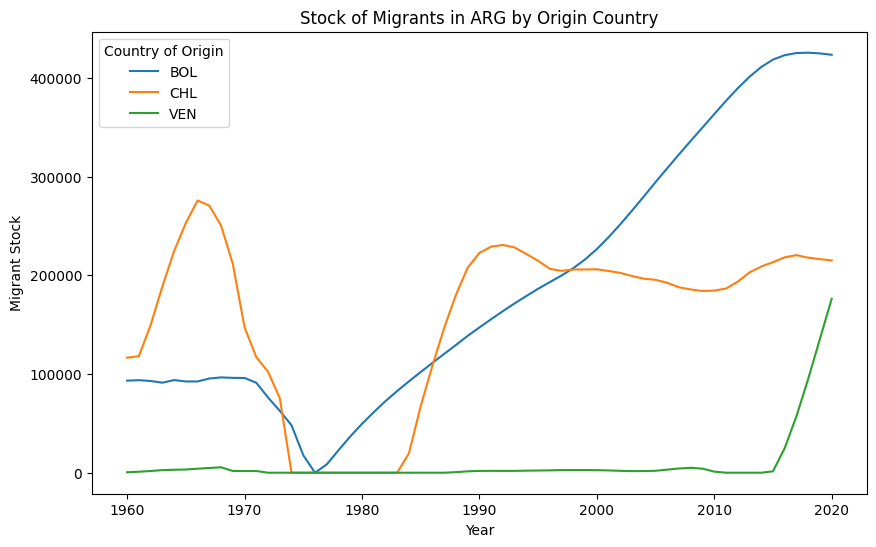

In [44]:
# Iterate through unique destination countries
for iso_des in migration_origin['iso_des'].unique():
    # Filter data for the current destination country
    destination_data = migration_origin[migration_origin['iso_des'] == iso_des]

    plt.figure(figsize=(10, 6))

    # Iterate through unique origin countries for the current destination
    for iso_or in destination_data['iso_or'].unique():
        # Filter data for the current origin country
        origin_data = destination_data[destination_data['iso_or'] == iso_or]

        # Plot the line plot for the current origin country
        sns.lineplot(x='year', y='stock', data=origin_data, label=iso_or)

    # Set plot title and labels
    plt.title(f'Stock of Migrants in {iso_des} by Origin Country')
    plt.xlabel('Year')
    plt.ylabel('Migrant Stock')
    plt.legend(title='Country of Origin')
    plt.show()

Estos datos deben actualizarse con los datos más recientes censales y ajustar valores de población y migración con la información oficial.

## Combining mobility and migration data

**mouvements + migrants stock**



In [45]:
## df the stock de migrantes en ARG y CHL: latam_mig_df
## stock total de migrantes por año : latam_mig_df_grp
## mobility database target ARG and CHL : mobility_df
## total trips to ARG and CHL by year: country_source_df_grp

total_mov_mig = pd.merge(country_source_df_grp, latam_mig_df_grp, on=['year', 'country_code'], how='left')

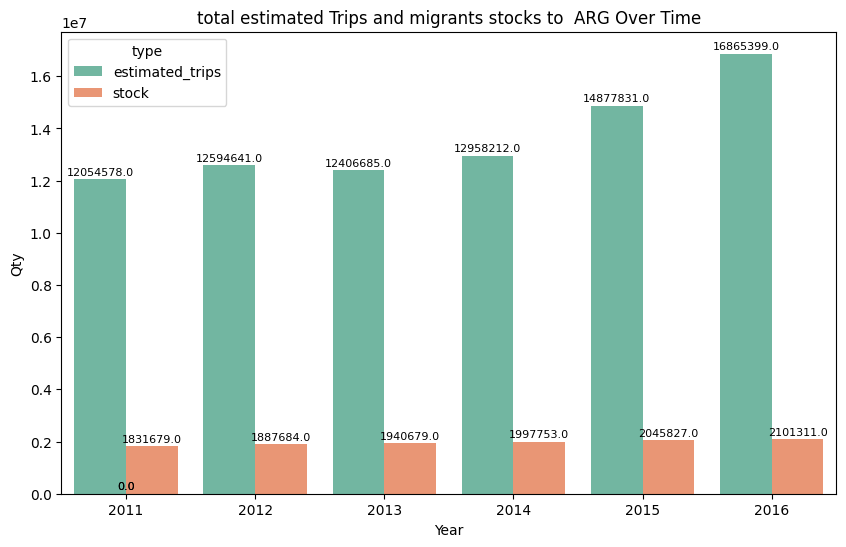

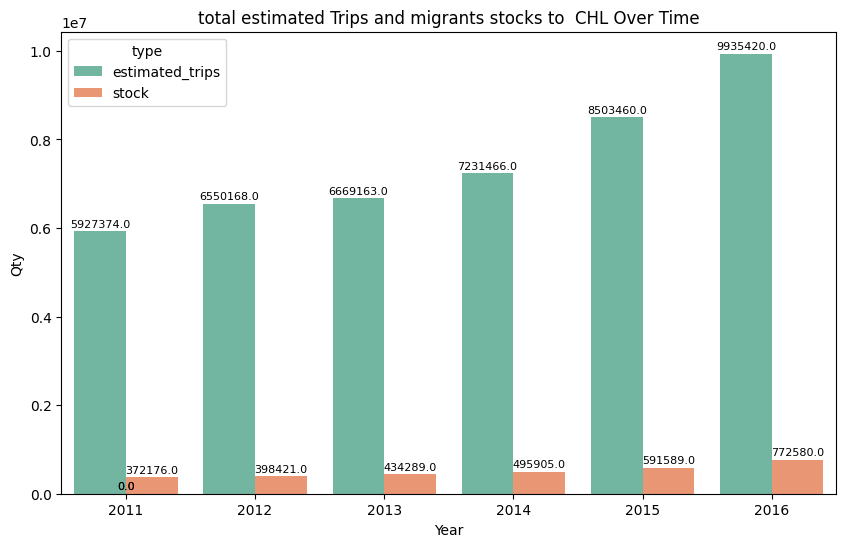

In [46]:
melted_df = pd.melt(total_mov_mig, id_vars=['year', 'country_code'],
                    value_vars=['estimated_trips', 'stock'],
                    var_name='type', value_name='value_m')

melted_df['value_m'] = pd.to_numeric(melted_df['value_m'], errors='coerce').astype('Int64')

for country in melted_df['country_code'].unique():
    destination_data = melted_df[melted_df['country_code'] == country]

    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x='year', y='value_m', hue='type', data=destination_data, palette = "Set2")
    plt.title(f'total estimated Trips and migrants stocks to  {country} Over Time')
    plt.xlabel('Year')
    plt.ylabel('Qty')

    for p in ax.patches:
        ax.annotate(f'{p.get_height():.1f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                    textcoords='offset points')
    plt.show()


**Movements and migratory stock of Bolivians to Argentina and Chile.**

In [47]:
# Filter mouvements for source_iso3 'BOL' and target_iso2 'CHL' and 'ARG'
bol_mov = mobility_df[(mobility_df['source_iso3'] == 'BOL') & (mobility_df['target_iso3'].isin(['CHL', 'ARG']))]
bol_mov = bol_mov[['source_iso3', 'target_iso3', 'year', 'estimated_trips']]

#filter migration database for origin = BOL
bol_mig= latam_mig_df[(latam_mig_df['iso_or'] == 'BOL') & (latam_mig_df['iso_des'].isin(['CHL', 'ARG']))]
bol_mig = bol_mig[['iso_or', 'iso_des', 'year', 'stock']]


In [48]:
# Rename columns for merging
bol_mov = bol_mov.rename(columns={'target_iso3': 'country_dest','source_iso3': 'country_source'})
bol_mig = bol_mig.rename(columns={'iso_des': 'country_dest', 'iso_or': 'country_source'})

# Merge the dataframes
bol_mov_mig = pd.merge(bol_mov, bol_mig, on=['country_source', 'country_dest', 'year'], how='left')

bol_mov_mig

,country_source,country_dest,year,estimated_trips,stock
0,BOL,ARG,2014,576578.0,411125
1,BOL,CHL,2013,460319.0,36745
2,BOL,ARG,2012,406932.0,389591
3,BOL,ARG,2016,668119.0,423108
4,BOL,ARG,2013,465051.0,401202
5,BOL,CHL,2016,522177.0,66310
6,BOL,ARG,2015,613185.0,418622
7,BOL,CHL,2014,484388.0,43684
8,BOL,CHL,2011,377832.0,28017
9,BOL,CHL,2015,504314.0,53312


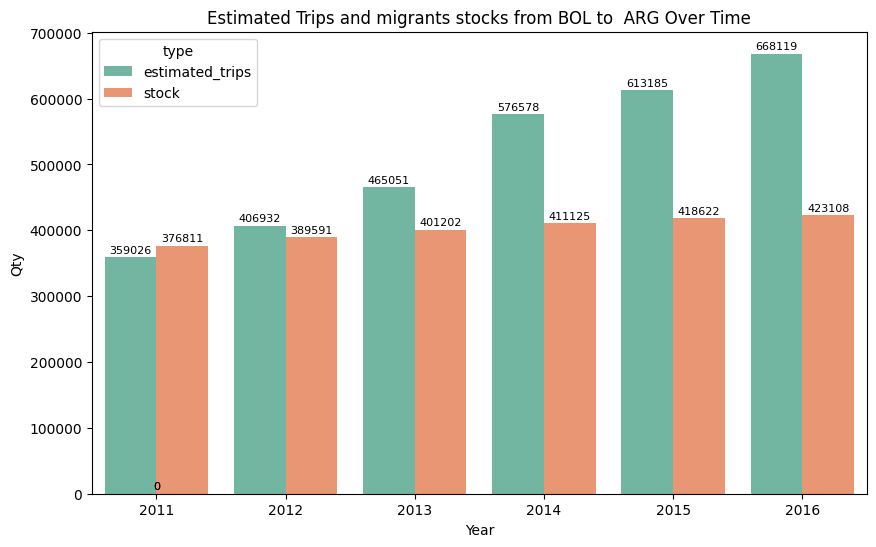

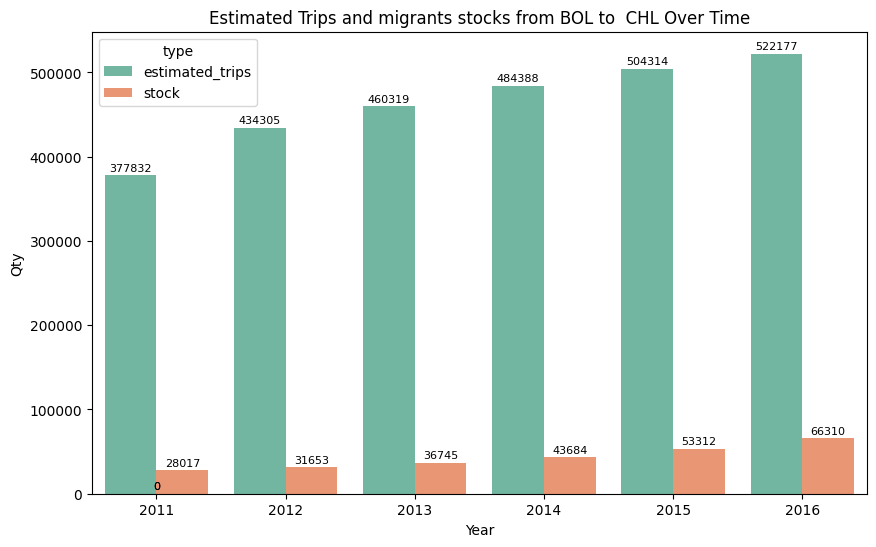

In [49]:
melted_df = pd.melt(bol_mov_mig, id_vars=['year', 'country_dest'],
                    value_vars=['estimated_trips', 'stock'],
                    var_name='type', value_name='value_m')

melted_df['value_m'] = pd.to_numeric(melted_df['value_m'], errors='coerce').astype('Int64')

for country in melted_df['country_dest'].unique():
    destination_data = melted_df[melted_df['country_dest'] == country]

    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x='year', y='value_m', hue='type', data=destination_data, palette = "Set2")
    plt.title(f'Estimated Trips and migrants stocks from BOL to  {country} Over Time')
    plt.xlabel('Year')
    plt.ylabel('Qty')

    for p in ax.patches:
        ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                    textcoords='offset points')
    plt.show()

**Movements and migratory stock of venezuelian to Argentina and Chile.**

In [50]:
# Filter mouvements for source_iso3 'BOL' and target_iso2 'CHL' and 'ARG'
ven_mov = mobility_df[(mobility_df['source_iso3'] == 'VEN') & (mobility_df['target_iso3'].isin(['CHL', 'ARG']))]
ven_mov = ven_mov[['source_iso3', 'target_iso3', 'year', 'estimated_trips']]

#filter migration database for origin = BOL
ven_mig= latam_mig_df[(latam_mig_df['iso_or'] == 'VEN') & (latam_mig_df['iso_des'].isin(['CHL', 'ARG']))]
ven_mig = ven_mig[['iso_or', 'iso_des', 'year', 'stock']]


In [51]:
# Rename columns for merging
ven_mov = ven_mov.rename(columns={'target_iso3': 'country_dest','source_iso3': 'country_source'})
ven_mig = ven_mig.rename(columns={'iso_des': 'country_dest', 'iso_or': 'country_source'})

# Merge the dataframes
ven_mov_mig = pd.merge(ven_mov, ven_mig, on=['country_source', 'country_dest', 'year'], how='left')

ven_mov_mig

,country_source,country_dest,year,estimated_trips,stock
0,VEN,CHL,2013,56746.0,13951
1,VEN,CHL,2012,63198.0,10070
2,VEN,ARG,2016,83783.0,24999
3,VEN,CHL,2016,83651.0,133624
4,VEN,CHL,2011,83841.0,11040
5,VEN,ARG,2011,132276.0,0
6,VEN,CHL,2015,60878.0,54887
7,VEN,ARG,2014,138234.0,0
8,VEN,ARG,2012,128219.0,0
9,VEN,ARG,2015,125041.0,1420


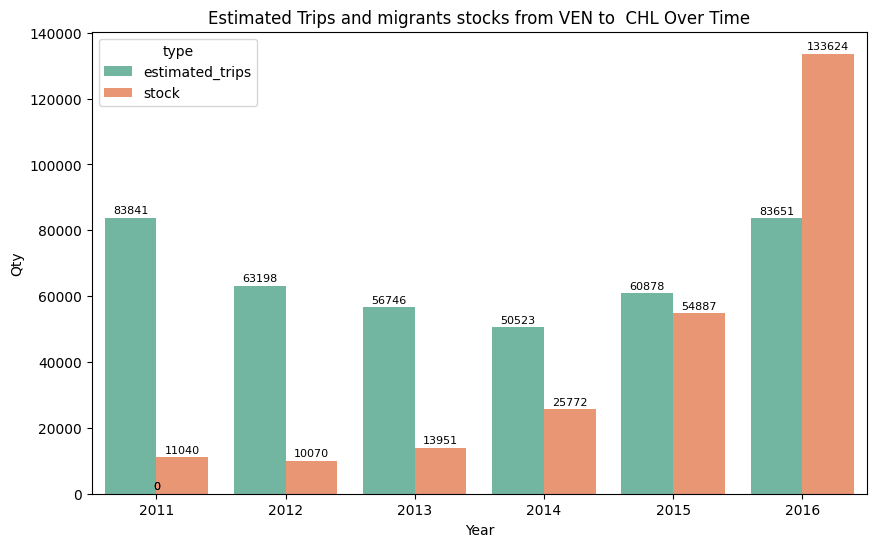

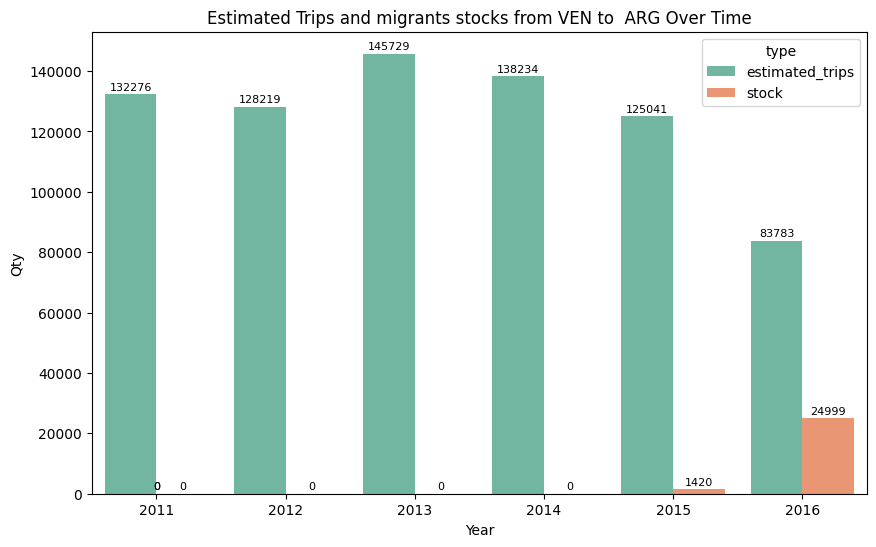

In [52]:
melted_df = pd.melt(ven_mov_mig, id_vars=['year', 'country_dest'],
                    value_vars=['estimated_trips', 'stock'],
                    var_name='type', value_name='value_m')

melted_df['value_m'] = pd.to_numeric(melted_df['value_m'], errors='coerce').astype('Int64')

for country in melted_df['country_dest'].unique():
    destination_data = melted_df[melted_df['country_dest'] == country]

    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x='year', y='value_m', hue='type', data=destination_data, palette = "Set2")
    plt.title(f'Estimated Trips and migrants stocks from VEN to  {country} Over Time')
    plt.xlabel('Year')
    plt.ylabel('Qty')

    for p in ax.patches:
        ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                    textcoords='offset points')
    plt.show()

###mobility and migratory administrative data


In [56]:
# Replace 'your_file_path' with the actual path to your CSV file in Google Drive
file_path = '/content/drive/MyDrive/3. Proyectos/MIGMOBS_nat/3_data_repository/db_migracion.csv'

df_migration = pd.read_csv(file_path)

## df the stock de migrantes en ARG y CHL: latam_mig_df
## stock total de migrantes por año : latam_mig_df_grp
## mobility database target ARG and CHL : mobility_df
## total trips to ARG and CHL by year: country_source_df_grp
print(df_migration['variable_name'].unique())

['entries_mouvements' 'exits_mouvements' 'permante_residence'
 'temporary_residence']


In [72]:
df_migration

,country_code,year,value,origin,variable_name,indicator,fuente
0,ARG,2011,428566,BOL,entries_mouvements,Migration entries movements,DNM
1,ARG,2012,367350,BOL,entries_mouvements,Migration entries movements,DNM
2,ARG,2013,468087,BOL,entries_mouvements,Migration entries movements,DNM
3,ARG,2014,660969,BOL,entries_mouvements,Migration entries movements,DNM
4,ARG,2015,861513,BOL,entries_mouvements,Migration entries movements,DNM
...,...,...,...,...,...,...,...
380,CHL,2019,149889,Total,permante_residence,Permanent residence,SERMIG
381,CHL,2020,57618,Total,permante_residence,Permanent residence,SERMIG
382,CHL,2021,51906,Total,permante_residence,Permanent residence,SERMIG
383,CHL,2022,89659,Total,permante_residence,Permanent residence,SERMIG


**Trips and migratory entry movements**



In [77]:
#get the total entries only
df_entries = df_migration[(df_migration['variable_name'] == 'entries_mouvements') & (df_migration['origin'] == 'Total')]

In [78]:
# Create a new DataFrame with selected columns and rename 'value' to 'entries'
df_entries = df_entries[['year', 'country_code', 'value']].rename(columns={'value': 'entries'})

# Display the first few rows of the new DataFrame
print(df_entries.head())

    year country_code   entries
16  2011          ARG  13241466
17  2012          ARG  12723787
18  2013          ARG  15680510
19  2014          ARG  17298427
20  2015          ARG  15993927


In [73]:
## get the movements
total_mov_mig = pd.merge(df_entries,country_source_df_grp, on=['year', 'country_code'], how='left')

total_mov_mig = total_mov_mig[total_mov_mig['country_code'] == 'ARG']

total_mov_mig

,year,country_code,entries,estimated_trips
0,2015,ARG,31028477,14877831.0
1,2016,ARG,36405194,16865399.0
2,2017,ARG,39680490,NaN
3,2018,ARG,36681246,NaN
4,2019,ARG,34411840,NaN
5,2020,ARG,9704698,NaN


❌ ❗
These data generate doubts in my mind.
In 2015 we have 14,877,831 trips to ARG but twice as many arrivals.

If I take for 2015 the incoming movements, through Ezeiza there are about 5million and through Aeroparque 1 million and something.

Are these mobility data only for air travel?

There is a very wide difference.


In [74]:
melted_df = pd.melt(total_mov_mig, id_vars=['year', 'country_code'],
                    value_vars=['estimated_trips', 'entries'],
                    var_name='mouvement', value_name='quantity')

melted_df['quantity'] = pd.to_numeric(melted_df['quantity'], errors='coerce').astype('Int64')

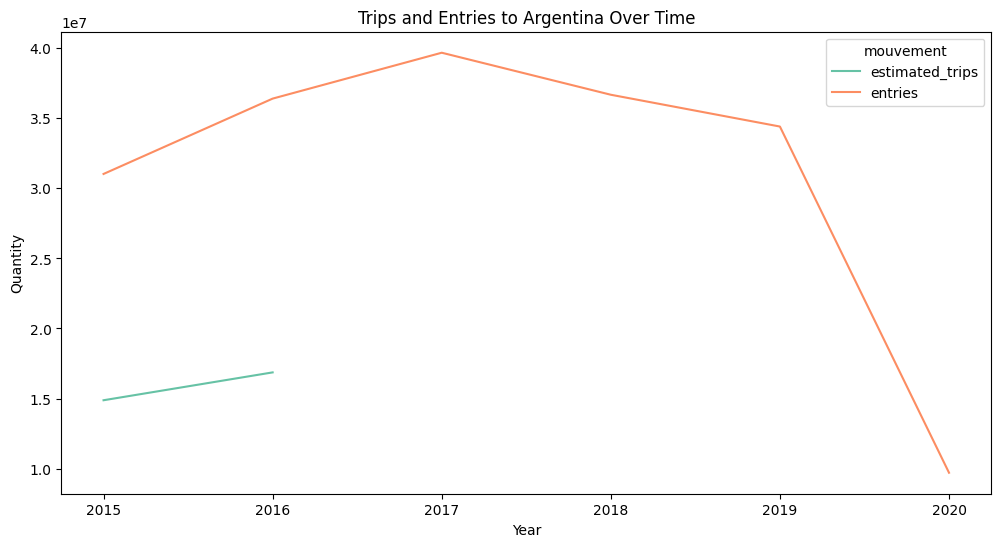

In [76]:

plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='quantity', hue='mouvement', data=melted_df, palette = "Set2")
plt.title('Trips and Entries to Argentina Over Time')
plt.xlabel('Year')
plt.ylabel('Quantity')
plt.show()

**Trips and migratory foreigners entry movements**

In [83]:
#get the total entries only
df_entries = df_migration[(df_migration['variable_name'] == 'entries_mouvements') & (df_migration['origin'] == 'Total foreigners')]
# Create a new DataFrame with selected columns and rename 'value' to 'entries'
df_entries = df_entries[['year', 'country_code', 'value']].rename(columns={'value': 'entries'})


In [88]:
## get the movements
df_mov_mig = pd.merge(df_entries,country_source_df_grp, on=['year', 'country_code'], how='left')

df_mov_mig = df_mov_mig[df_mov_mig['country_code'] == 'ARG']

df_mov_mig

,year,country_code,entries,estimated_trips
0,2011,ARG,13241466,12054578.0
1,2012,ARG,12723787,12594641.0
2,2013,ARG,15680510,12406685.0
3,2014,ARG,17298427,12958212.0
4,2015,ARG,15993927,14877831.0
5,2018,ARG,15136781,NaN
6,2019,ARG,15760262,NaN
7,2020,ARG,4563693,NaN
8,2021,ARG,1475176,NaN
9,2022,ARG,14144168,NaN


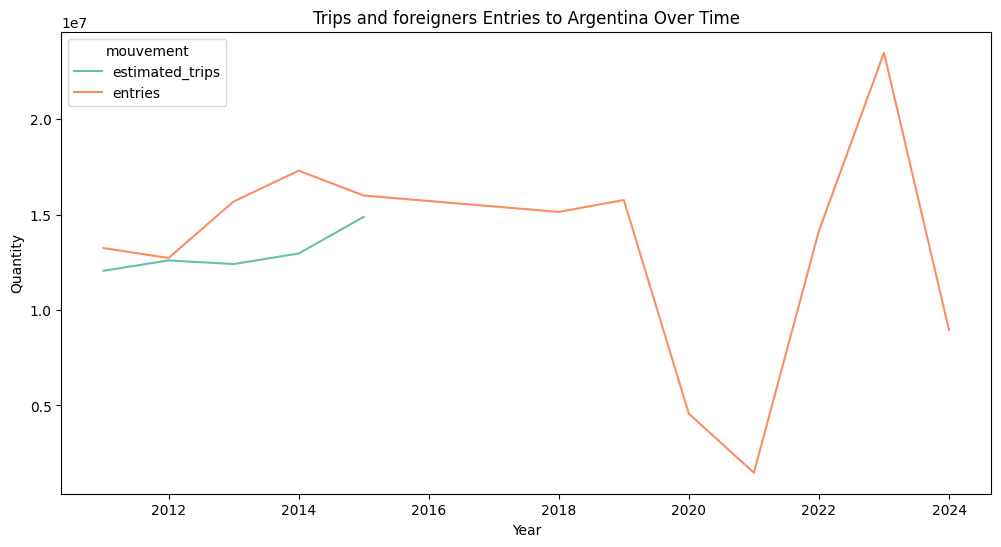

In [86]:
melted_df = pd.melt(df_mov_mig, id_vars=['year', 'country_code'],
                    value_vars=['estimated_trips', 'entries'],
                    var_name='mouvement', value_name='quantity')

melted_df['quantity'] = pd.to_numeric(melted_df['quantity'], errors='coerce').astype('Int64')

plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='quantity', hue='mouvement', data=melted_df, palette = "Set2")
plt.title('Trips and foreigners Entries to Argentina Over Time')
plt.xlabel('Year')
plt.ylabel('Quantity')
plt.show()

**Temporary residences ands trips by year to ARG**

In [92]:
#get the total entries only
df_residences = df_migration[(df_migration['variable_name'] == 'temporary_residence') & (df_migration['origin'] == 'Total')]
# Create a new DataFrame with selected columns and rename 'value' to 'entries'
df_residences = df_residences[['year', 'country_code', 'value']].rename(columns={'value': 'temporary_residences'})

In [93]:
## get the movements
df_mov_mig = pd.merge(df_residences,country_source_df_grp, on=['year', 'country_code'], how='left')

df_mov_mig = df_mov_mig[df_mov_mig['country_code'] == 'ARG']

df_mov_mig

,year,country_code,temporary_residences,estimated_trips
0,2021,ARG,53819,NaN
1,2022,ARG,84418,NaN
2,2023,ARG,96831,NaN
3,2024,ARG,37803,NaN
4,2004,ARG,40039,NaN
5,2005,ARG,53529,NaN
6,2006,ARG,336987,NaN
7,2007,ARG,209639,NaN
8,2008,ARG,133803,NaN
9,2009,ARG,153030,NaN


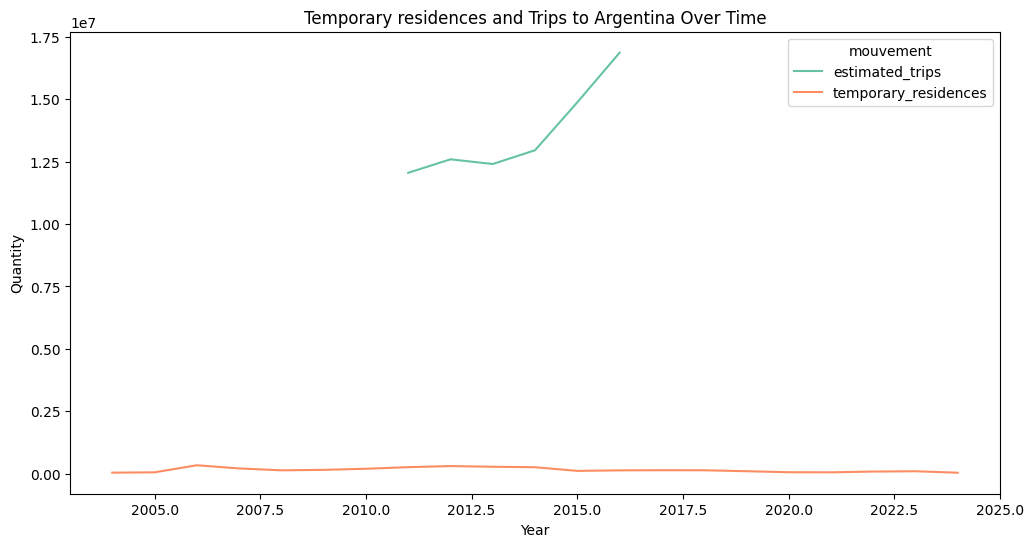

In [94]:
melted_df = pd.melt(df_mov_mig, id_vars=['year', 'country_code'],
                    value_vars=['estimated_trips', 'temporary_residences'],
                    var_name='mouvement', value_name='quantity')

melted_df['quantity'] = pd.to_numeric(melted_df['quantity'], errors='coerce').astype('Int64')

plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='quantity', hue='mouvement', data=melted_df, palette = "Set2")
plt.title('Temporary residences and Trips to Argentina Over Time')
plt.xlabel('Year')
plt.ylabel('Quantity')
plt.show()

The application for temporary residency in Argentina is a good indicator to measure who stays for more than three months.

Generally in Argentina, before 3 months, people make some kind of regularization request. Those who do it less often are Europeans or Americans who, not having the Mercosur Residence Agreement, enter and leave Uruguay every 3 months to renew their tourist visa.



**Temporary residences ands trips by year to CHL**